# 📓 Notebook Title: Linear Regression for Custom Time Series Forecasting

##  1. Introduction
In this notebook, we demonstrate how to forecast a custom-generated time series using linear regression. We'll simulate time-dependent data (trend + seasonality + noise), engineer features, fit models, and perform diagnostics.

## 2. Setup and Data Simulation

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [5]:
# Generate Custom Data

np.random.seed(42)  # For reproducibility

# Simulate 10 years of monthly data
n_years = 10
n_months = n_years * 12
time = np.arange(n_months)
months = np.tile(np.arange(1, 13), n_years)

# Create synthetic components
trend = 0.5 * time
seasonality = 10 * np.sin(2 * np.pi * months / 12)
noise = np.random.normal(0, 5, n_months)

# Target variable
y = 50 + trend + seasonality + noise

# Construct DataFrame
df = pd.DataFrame({
    'Month': pd.date_range(start='2010-01-01', periods=n_months, freq='MS'),
    'Target': y
})
df.set_index('Month', inplace=True)
df.head()


,Target
Month,
2010-01-01,57.483571
2010-02-01,58.468933
2010-03-01,64.238443
2010-04-01,67.775403
2010-05-01,55.829233


In [6]:
# Now let's generate Time_steps and time lag columns
df['Time_step'] = np.arange(len(df))
df['Lag_1'] = df['Target'].shift(1)
df['Lag_2'] = df['Target'].shift(2)
df['Lag_3'] = df['Target'].shift(3)
df['Lag_4'] = df['Target'].shift(4)
df['Lag_5'] = df['Target'].shift(5)
df['Lag_6'] = df['Target'].shift(6)
df['Lag_7'] = df['Target'].shift(7)

In [7]:
df.head()

,Target,Time_step,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Lag_6,Lag_7
Month,,,,,,,,,
2010-01-01,57.483571,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-01,58.468933,1,57.483571,NaN,NaN,NaN,NaN,NaN,NaN
2010-03-01,64.238443,2,58.468933,57.483571,NaN,NaN,NaN,NaN,NaN
2010-04-01,67.775403,3,64.238443,58.468933,57.483571,NaN,NaN,NaN,NaN
2010-05-01,55.829233,4,67.775403,64.238443,58.468933,57.483571,NaN,NaN,NaN


For the Nan generated by the lag features, we can drop them or use the mean or median of the column, but for the sake of simplicity, we will drop them

In [ ]:
# Drop rows with NaN values (due to lagging)
df.dropna(inplace=True)

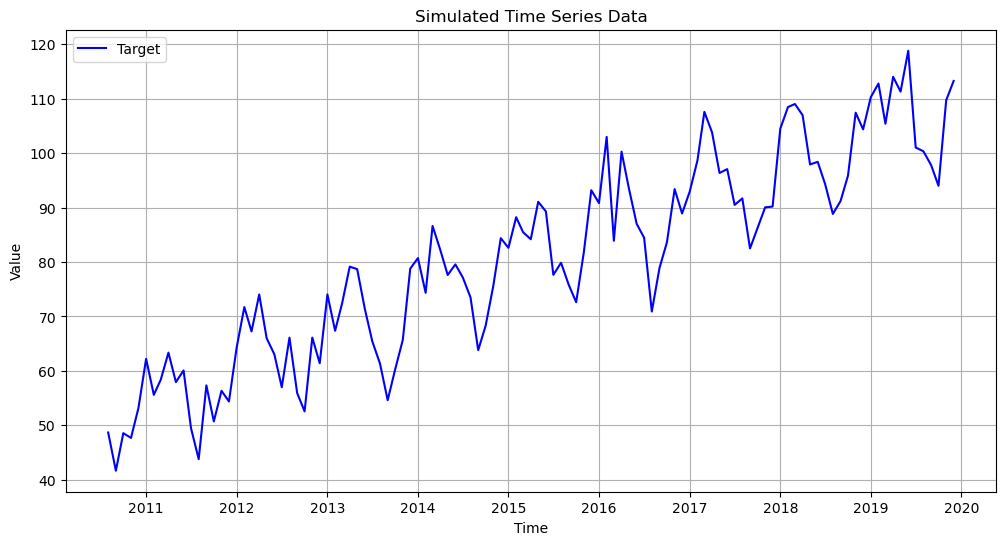

In [14]:
# Plot the Data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Target'], label='Target', color='blue')
plt.title("Simulated Time Series Data")
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid(True)
plt.legend()
plt.show()

## Feature Engineering

In [ ]:
# Polynomial trend
df['Target_sq2'] = df['Target']**2
df['Target_sq3'] = df['Target']**3

In [ ]:
# Monthly dummy variables
df = 

In [18]:
df.columns


Index(['Target', 'Time_step', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5',
       'Lag_6', 'Lag_7', 'Target_sq2', 'Target_sq3'],
      dtype='object')

## 4. Train/test

In [21]:
# Split the data into train and test sets
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

print(f"Train: {train.shape[0]} rows")
print(f"Test:  {test.shape[0]} rows")

Train: 90 rows
Test:  23 rows


In [22]:
# Create the X and y variables for the model
X_train = train.drop(columns=['Target'])
y_train = train['Target']

X_test = test.drop(columns=['Target'])
y_test = test['Target']

## 5. Linear Regression

In [24]:
# Model Training
model = LinearRegression(positive=False, fit_intercept=True, copy_X=True)
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
# Model Predictions
preds = model.predict(X_test)
preds

array([107.45122931, 107.86070463, 106.24353017,  98.02086809,
        98.47110056,  94.50717608,  88.94718394,  91.33123715,
        95.92643473, 106.48743867, 103.86341539, 108.96108941,
       110.99977004, 104.89175912, 111.98993569, 109.67865452,
       115.19190023, 100.58902495, 100.07681141,  97.73939368,
        94.2206393 , 108.37879523, 111.17368519])

In [29]:
# Model evaluation 
mse = mean_squared_error(y_test, preds)
mae = mean_absolute_error(y_test, preds)
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")    

Mean Squared Error: 1.56
Mean Absolute Error: 0.89


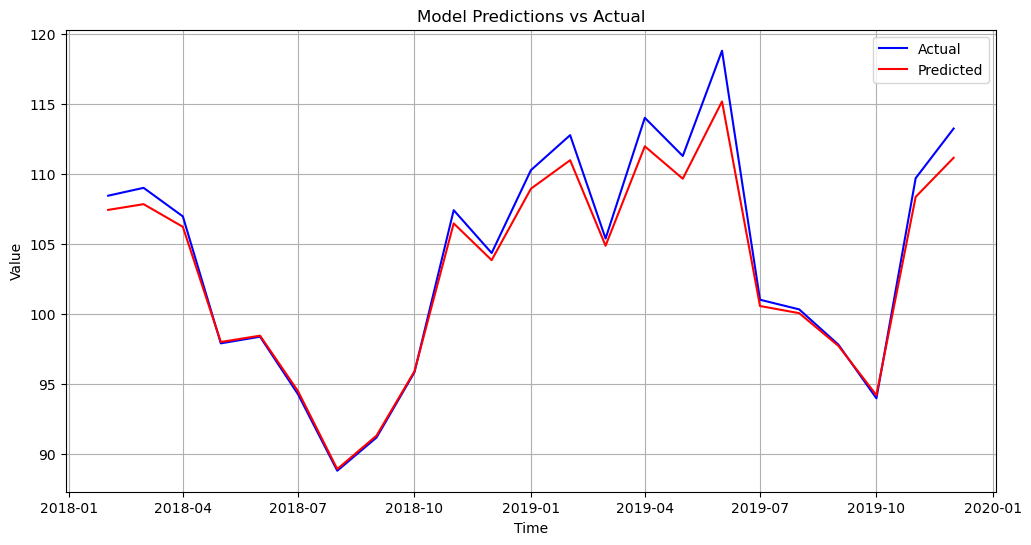

In [32]:
plt.figure(figsize=(12, 6))
plt.plot(test.index, y_test, label='Actual', color='blue')
plt.plot(test.index, preds, label='Predicted', color='red')
plt.title("Model Predictions vs Actual")    
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

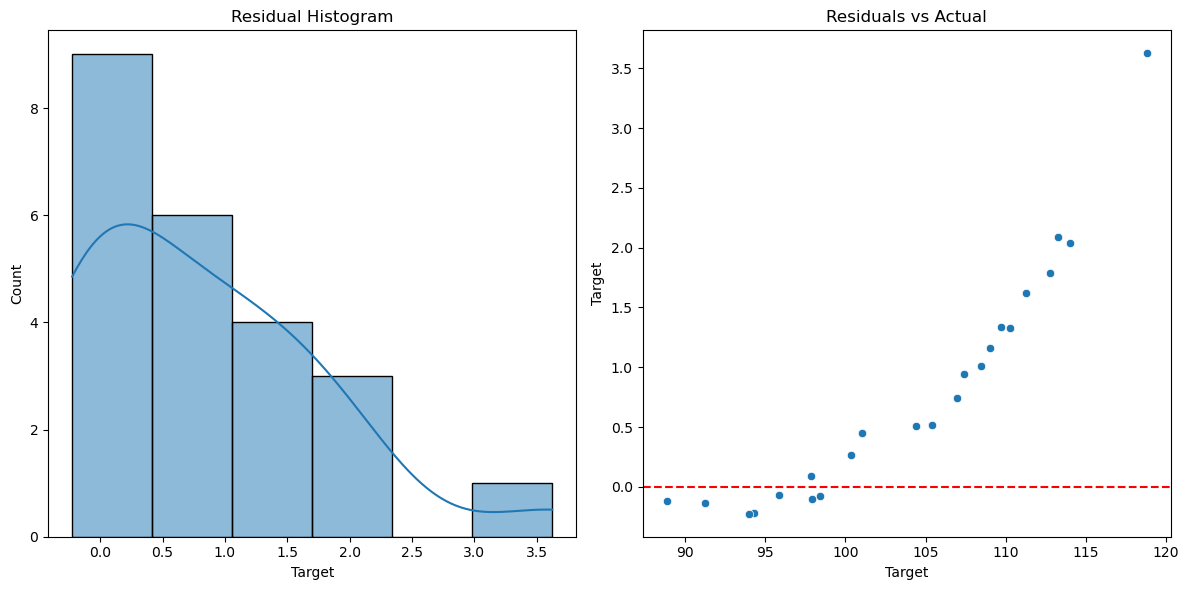

ValueError: could not broadcast input array from shape (23,) into shape (25,)

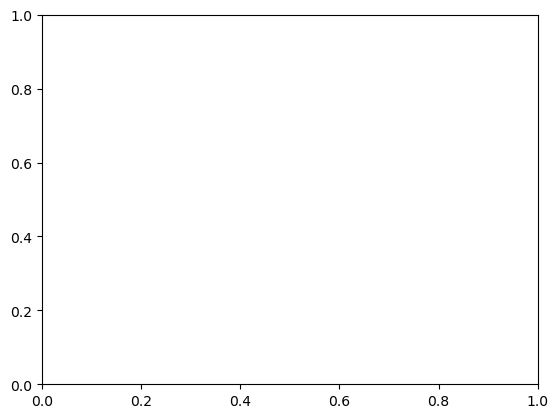

In [38]:
# Residuals
residuals = y_test - preds

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(12, 6))
sns.histplot(residuals, kde=True, ax=ax[0])
ax[0].set_title("Residual Histogram")

sns.scatterplot(x=y_test, y=residuals, ax=ax[1])
ax[1].set_title("Residuals vs Actual")
ax[1].axhline(0, color='red', linestyle='--')
plt.tight_layout()
plt.show()

# ACF plot
sm.graphics.tsa.plot_acf(residuals, lags=24)
plt.title("Residual ACF")
plt.show()
   

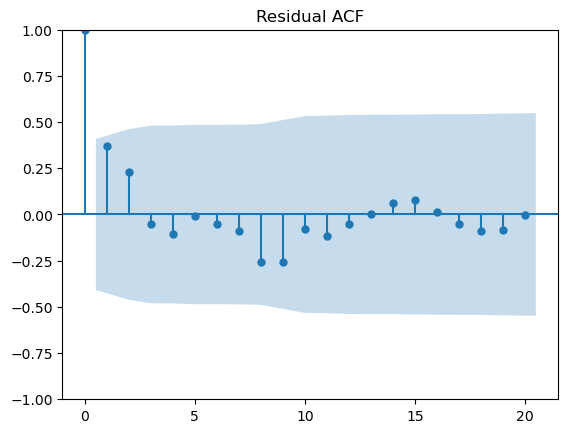

In [39]:
max_lags = min(20, len(residuals) - 1)
sm.graphics.tsa.plot_acf(residuals, lags=max_lags)
plt.title("Residual ACF")
plt.show()